<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/MachineLearning_model_MedicalInsurance_Premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project
In this project, we are going to work on a medical insurance dataset in building a predicitve model and is aimed at helping customer make better decisions in their choice of insurance covers.
The Dataset Contains Health Related Parameters Of The Customers. In this Project we use them To Build A Model And Also Perform EDA On The Same.
The Premium Price Is In INR(₹) Currency And Showcases Prices For A Whole Year.
THis dataset is obtained from Kaggle, and is available trhough the link, "/content/Medicalpremium.csv".

## First Step: loading the dataset and performing the neccesary exploratory analysis

In [24]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# import and load the dataset
data = pd.read_csv("/content/Medicalpremium.csv")
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [26]:
#general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [27]:
data.describe(include= "all")

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [28]:
#confirming any null values
data.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


## Data Visualization using ydata-profiling

In [29]:
#data profiling
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [30]:
profile = ProfileReport(data)
profile.to_file("Medicalpremium.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 26.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Selection
This project will use a RandomForest regressor in coming up with a model

In [31]:
#using randomforest regressor model
#importing neccesary libraries
#
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
#define feature and target
X = data.drop("PremiumPrice", axis = 1) # features
y = data["PremiumPrice"] # target variables

In [33]:
#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
#initializing and training the model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Making predictions
y_pred = model.predict(X_test)

## Evaluating the Model

In [36]:
#Evaluating the model
#
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1024.44
MSE: 5316742.42
R² Score: 0.88


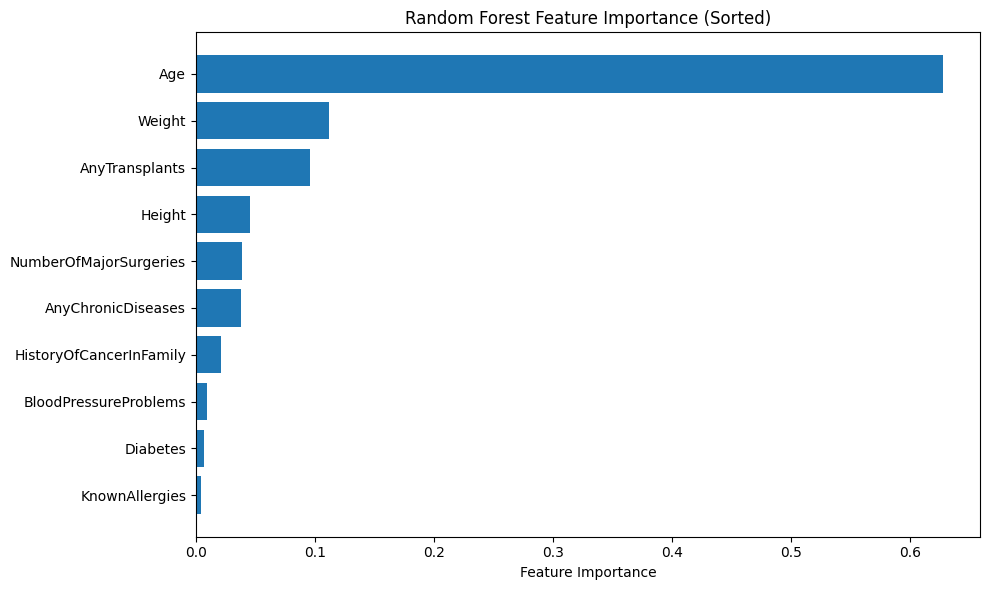

In [37]:
# Plotting to interpret65 the features based on their importances.

import matplotlib.pyplot as plt
import numpy as np

# Get importances and feature names
importances = model.feature_importances_
features = X.columns

# Sort feature importances and feature names
indices = np.argsort(importances)  # Ascending order
# For descending, use: indices = np.argsort(importances)[::-1]

sorted_importances = importances[indices]
sorted_features = features[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Sorted)")
plt.tight_layout()
plt.show()


Insights from the Project
Using a RandomForestClassifier, the model predicts from the medical premium dataset that Age as a variable is the most decisive factor in predicting the premium amounts for medical insurance customers.Weight and the history of transplants are also signifcant in shaping the premium amounts that customers would pay.
other factors were medium to lowly correlated with the amount of premium paid by patients.